# NLL Analysis across Units

This notebook plots the sentence-level NLL, comparing different units (word, character, BPE, morfessor, or morpheme).
Lower NLL means the language model (LM) is better fitted to the data.

In the charts below, each one shows the NLL of one unit compared to NLL of another unit. For example, the first chart is comparing word NLL (y-axis) to morfessor NLL (x-axis). Each point corresponds to a single sentence. The identity line is also plotted. Points that lie above this line represents sentences that are better represented by the unit in the y-axis (word, in the case of the first chart), while points that lie below this line represents sentences that are better represented by the unit in the x-axis (morfessor segmentation, in the case of the first chart).

### Observations

It seems that in general, **morpheme-based NLL seems to be the best**, followed by word-based. (Note that there morpheme-based NLL are only available in Yupik (Saint Lawrence Island) and Guarani).

Morfessor-based NLL seems to always be the lowest, while there does not seem to be much difference between character-based and BPE-based NLL.

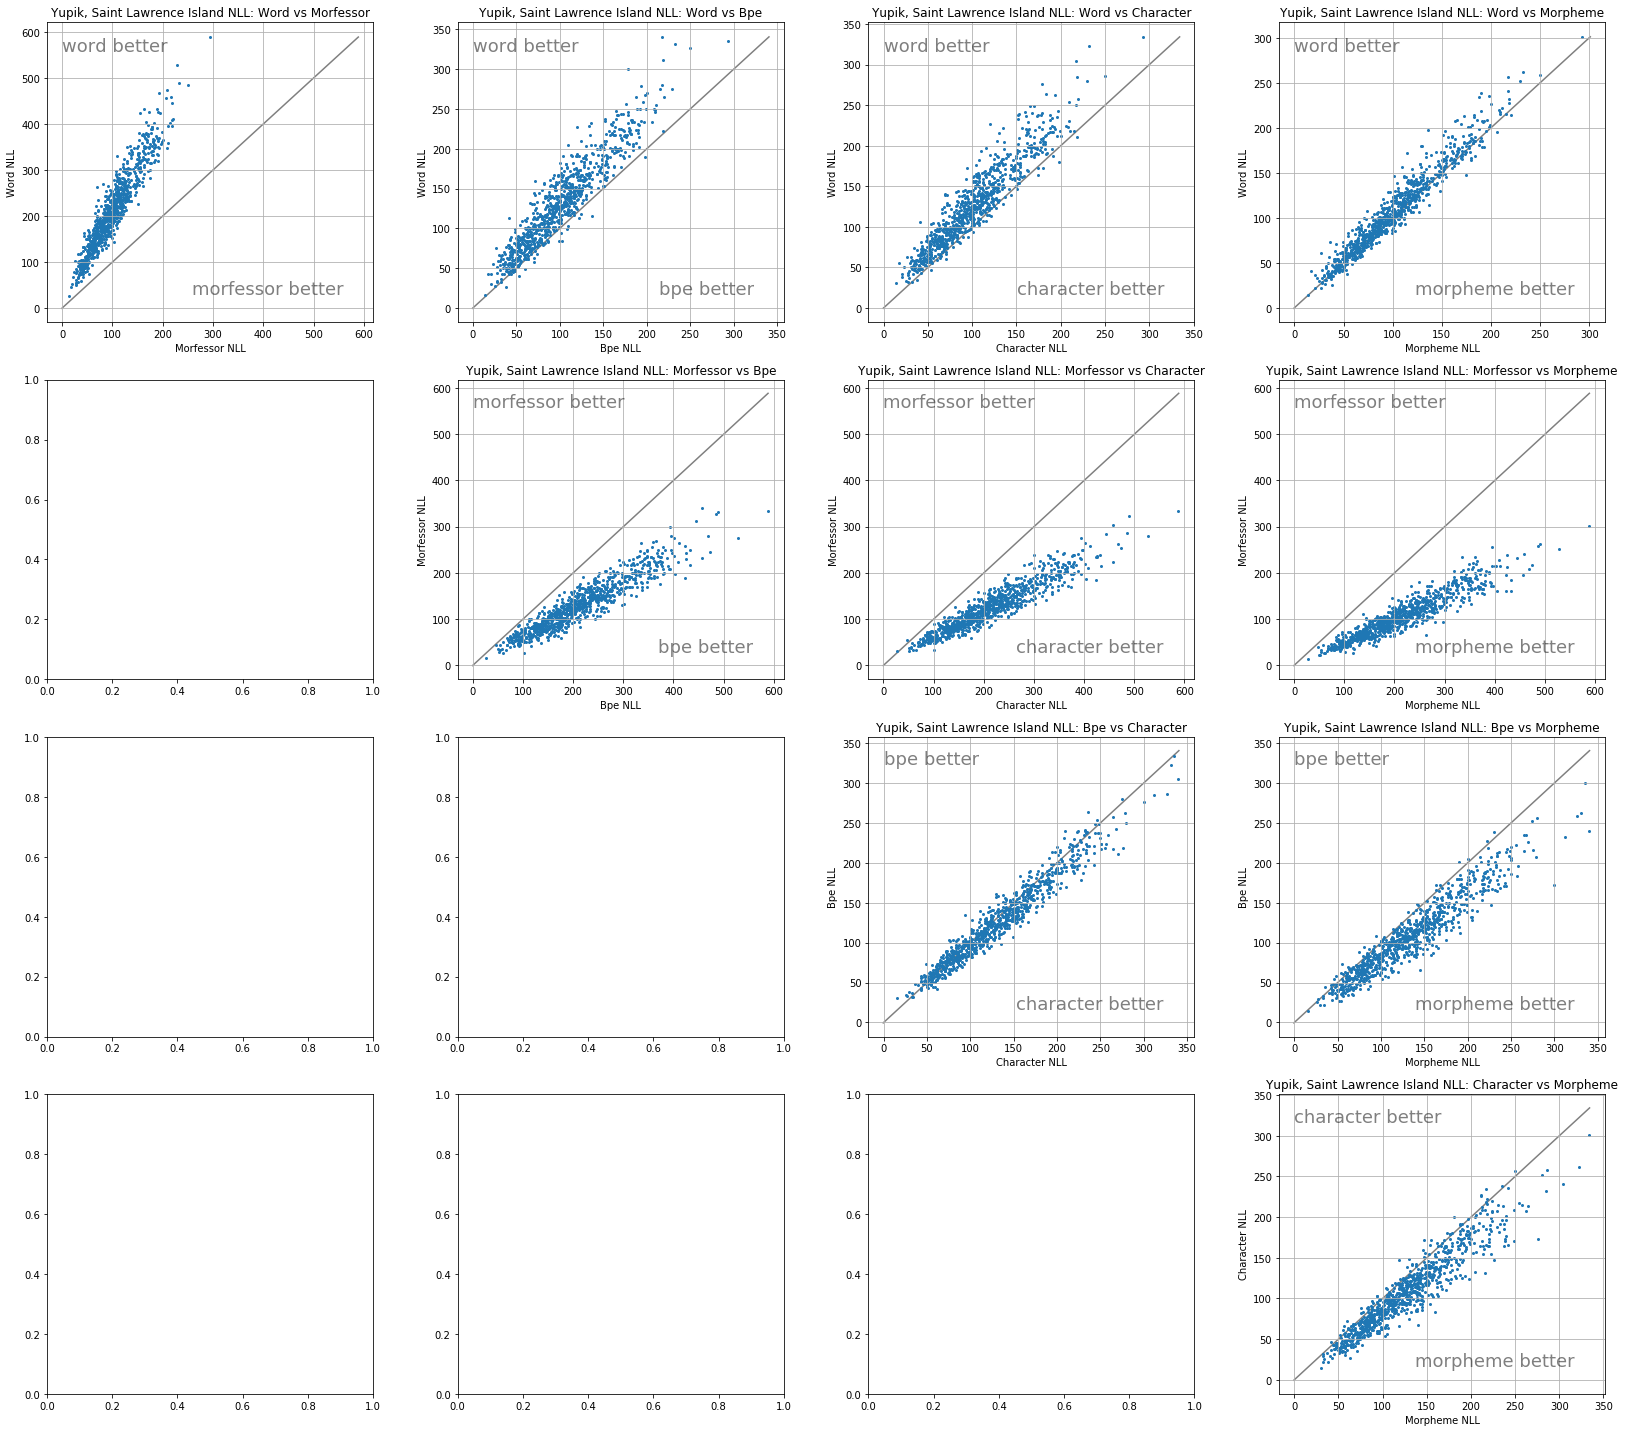

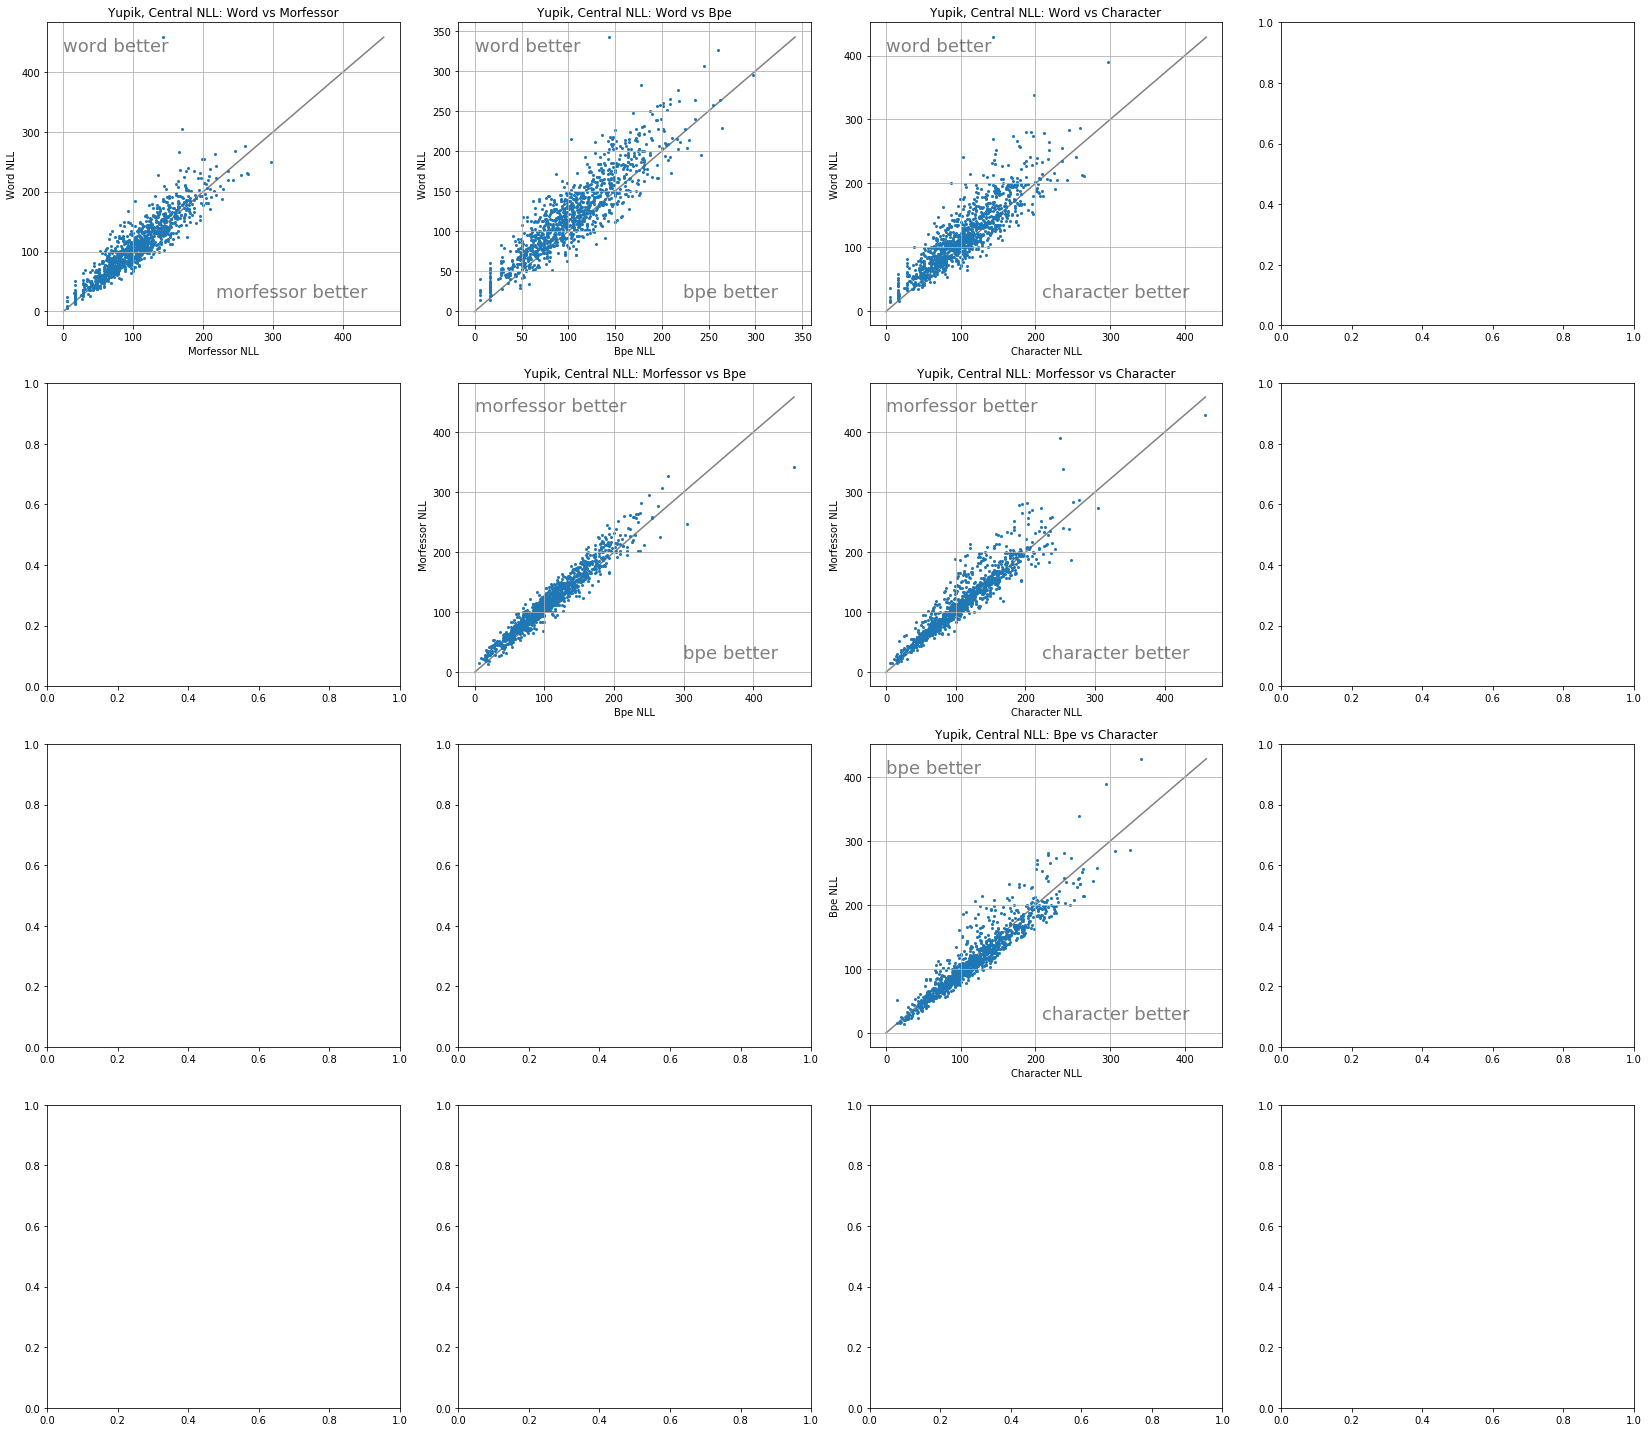

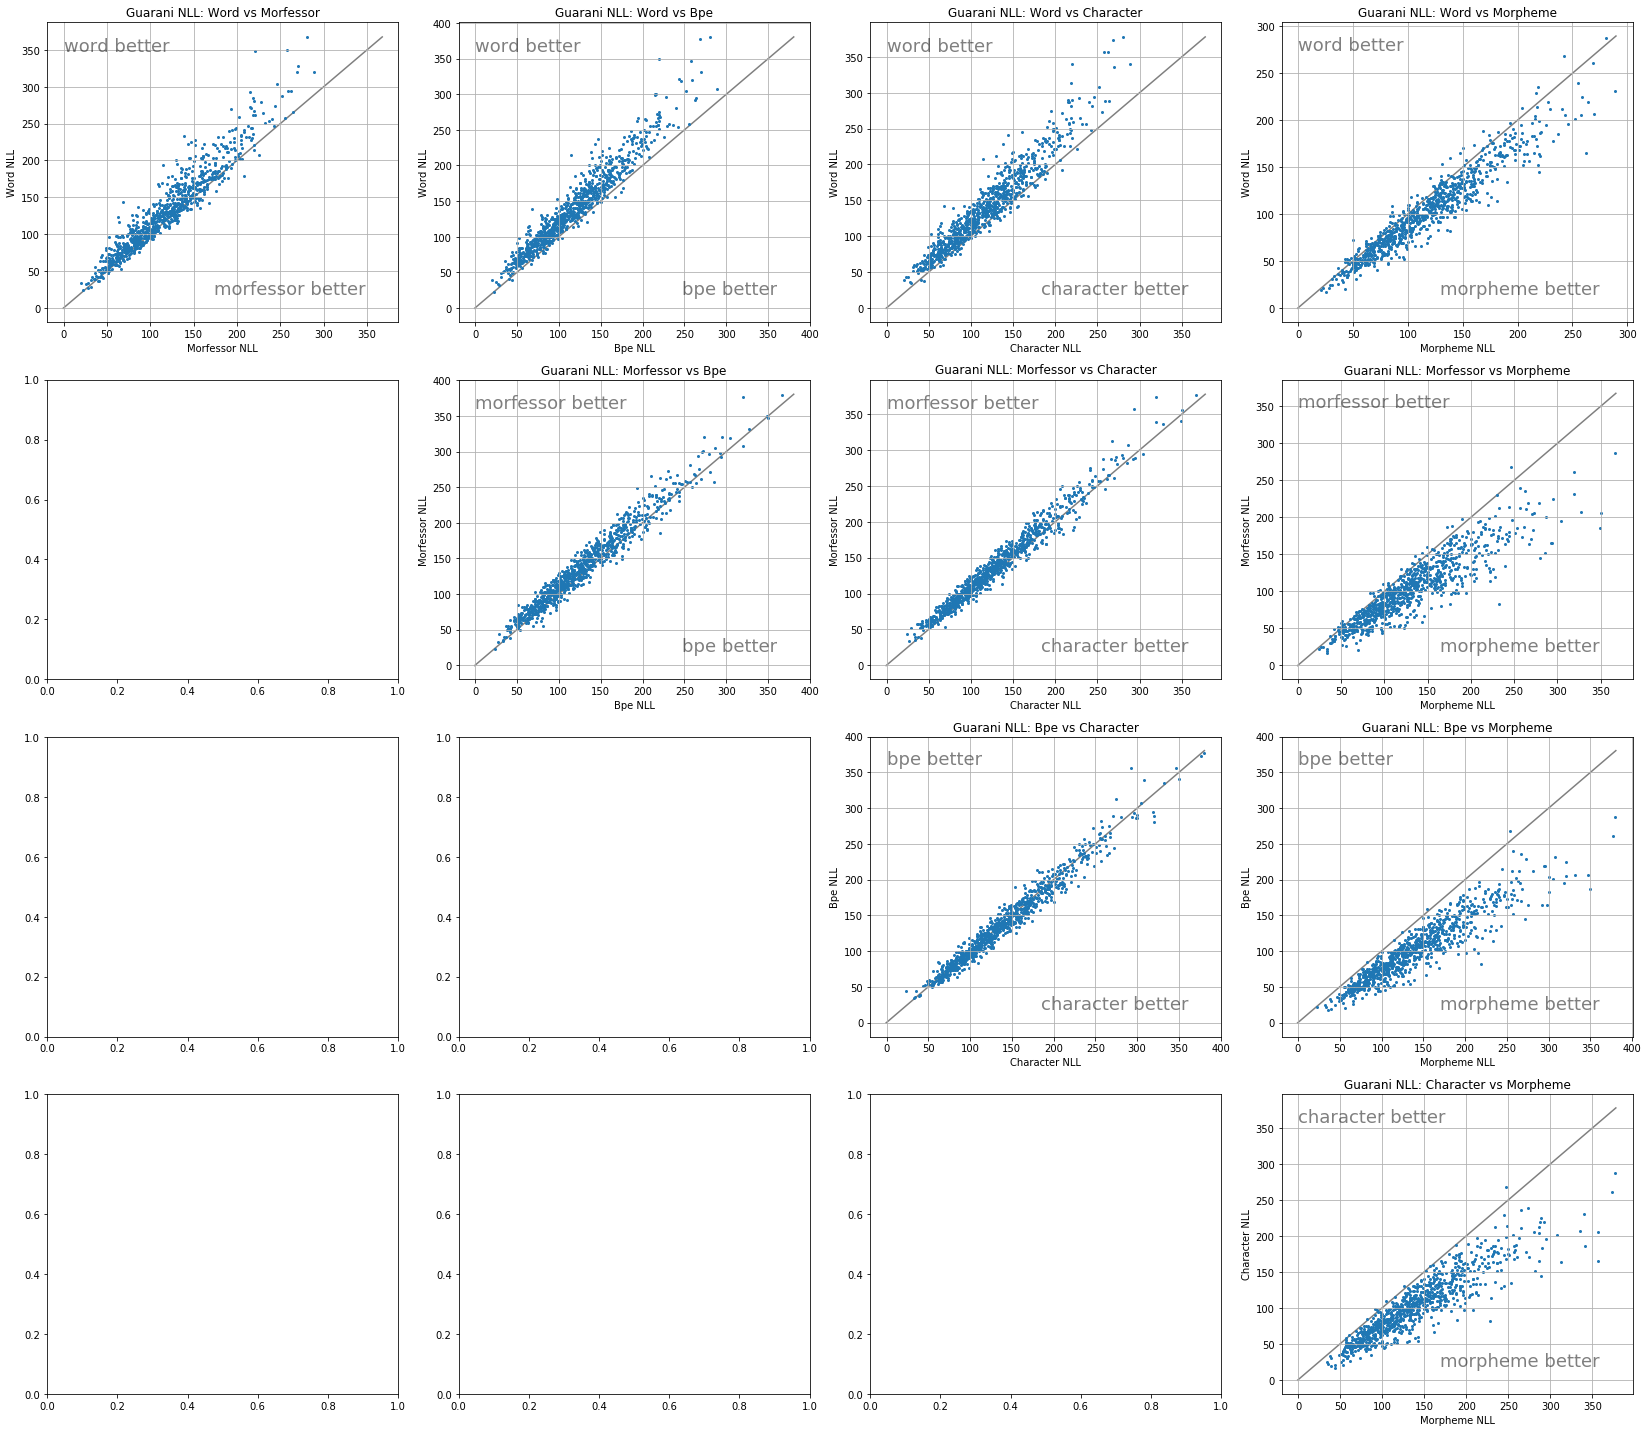

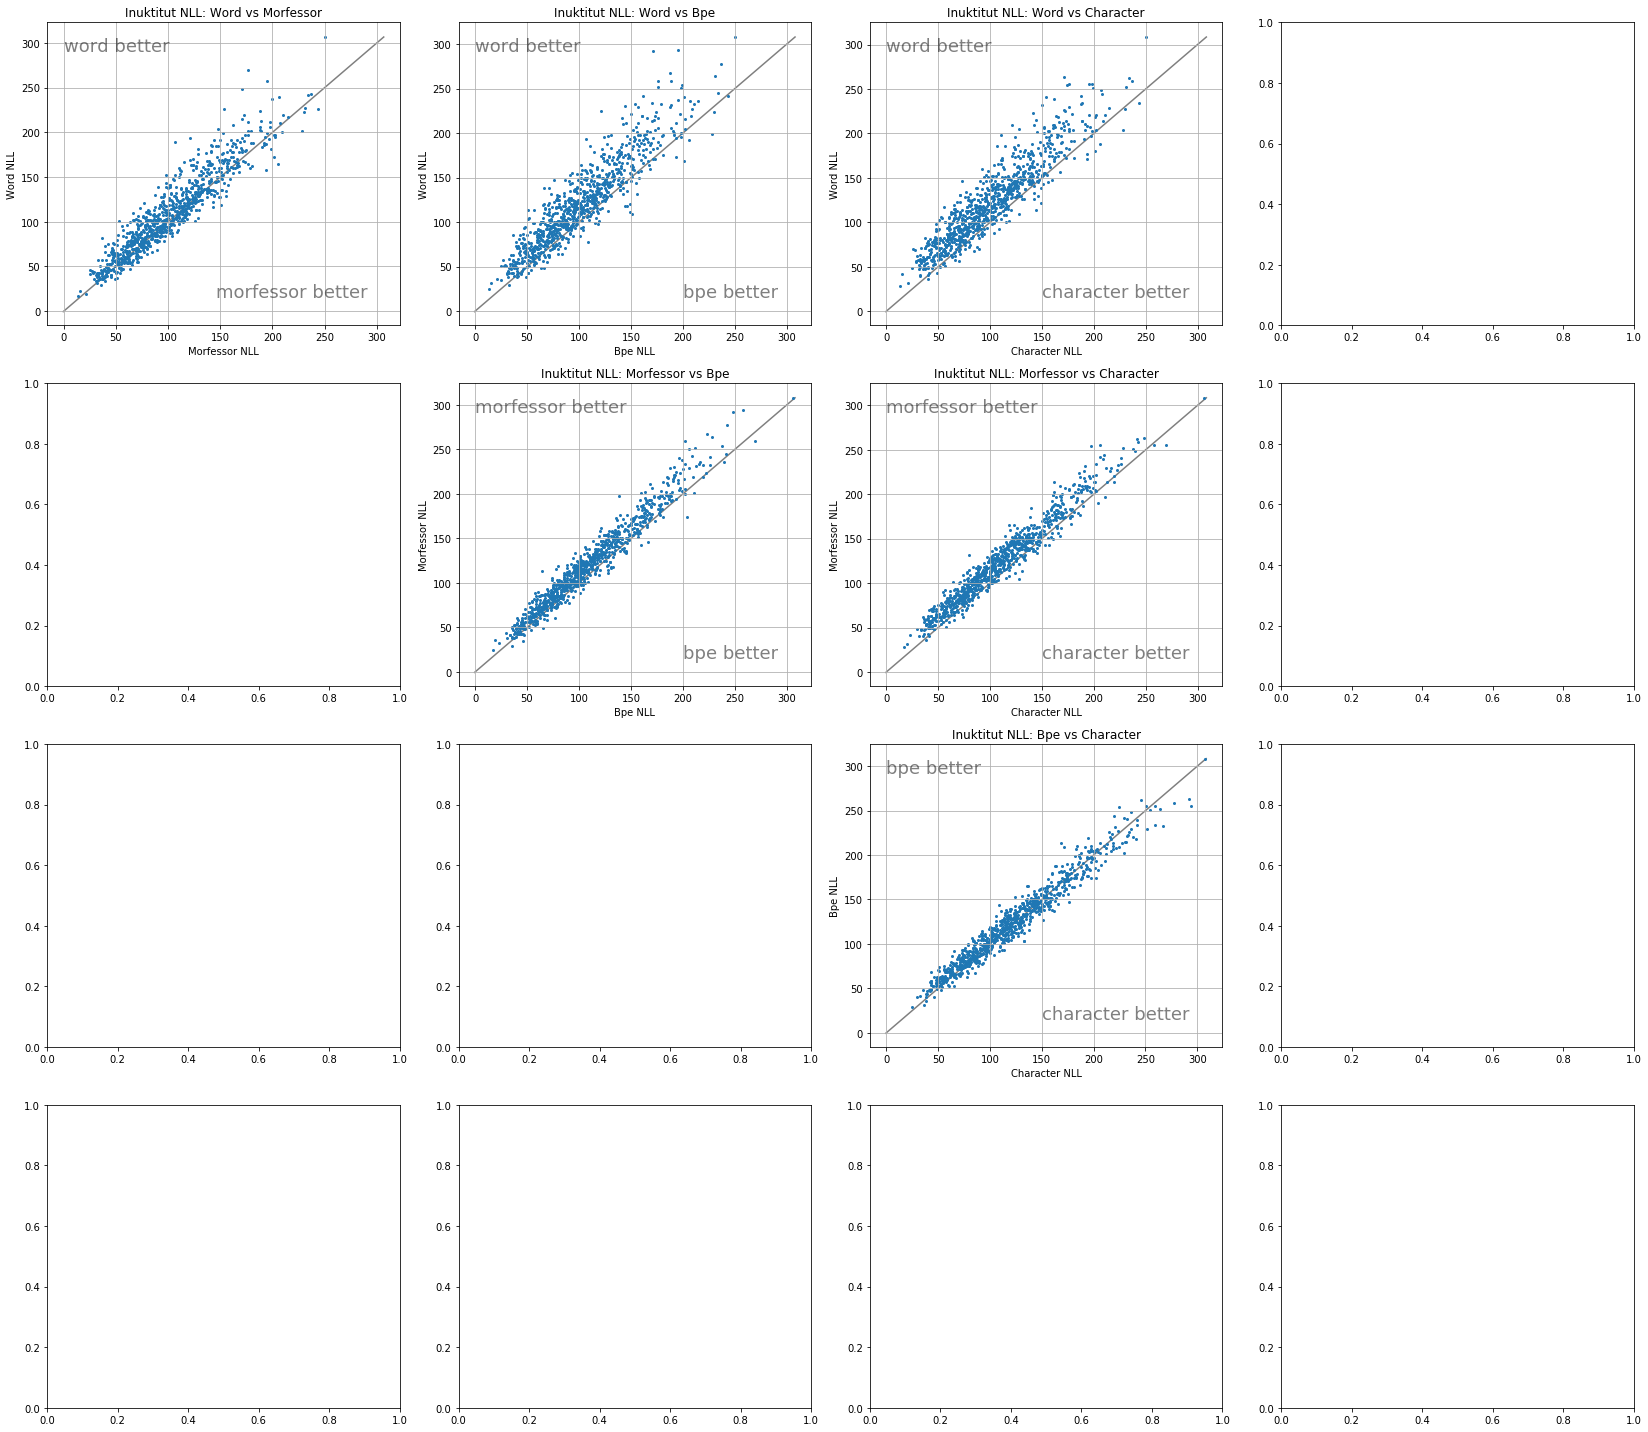

In [32]:
import json
import matplotlib.pyplot as plt
import math
import pandas as pd
from IPython.core.display import display, HTML

lang_map = {'Yupik, Central': 'esu.csv',
            'Yupik, Saint Lawrence Island': 'ess.csv',
            'Guarani': 'grn.csv',
            'Inuktitut': 'iku.csv'}

for lang, path in sorted(lang_map.items(), key=lambda x:x[1]):
    lang_code = path.split('.')[0]
    display(HTML('<h1>{}</h1>'.format(lang)))
    data = pd.read_csv(path)
    cols = ['word', 'morfessor', 'bpe', 'character', 'morpheme']
    fig, axes = plt.subplots(figsize=(23,20), nrows=4, ncols=4)
    for col1_idx in range(4):
        col1 = cols[col1_idx]
        for col2_idx in range(col1_idx+1, 5):
            col2 = cols[col2_idx]
            if col2 not in data:
                continue
            if col1 == col2:
                continue
            x = data[col1]
            y = data[col2]
            scatter_figpath = '{}_{}-{}.png'.format(lang_code, col1, col2)
            ax = axes[col1_idx][col2_idx-1]
            max_val = max([max(x), max(y)])
            ax.plot([-0.5, max_val+0.5], [-0.5, max_val+0.5], color='black', zorder=-1, alpha=0.5)
            ax.scatter(x, y, s=4)
            ax.set_ylabel('{} NLL'.format(col1.title()))
            ax.set_xlabel('{} NLL'.format(col2.title()))
            ax.set_title('{} NLL: {} vs {}'.format(lang, col1.title(), col2.title()))
            ax.grid()
            ax.annotate('{} better'.format(col1), (0, 0.95*max_val), fontsize=18, alpha=0.5)
            ax.annotate('{} better'.format(col2), (0.95*max_val, 0.05*max_val), fontsize=18, alpha=0.5, ha='right')
    plt.tight_layout()
    plt.savefig(scatter_figpath)
    plt.show()
    plt.close()